In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import os

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator


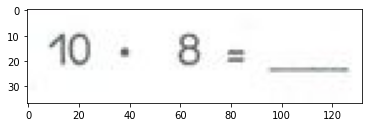

In [3]:
image = Image.open('testImages/class_a/equ1.jpg')
plt.imshow(image)

/var/folders/2c/lyzhdl754510k2k66wlmsgzm0000gn/T/ipykernel_1073/2549778268.py:2: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  resizedImg = image.resize((256, 256), Image.BICUBIC)


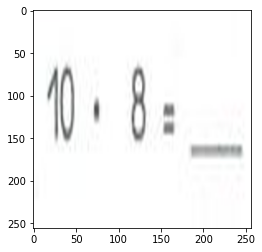

In [4]:
# Scaling 
resizedImg = image.resize((256, 256), Image.BICUBIC)
plt.imshow(resizedImg)

In [5]:
resizedImgArray = np.asarray(resizedImg).astype(np.float32) / 255.
print(resizedImgArray.size)
print(resizedImgArray.shape)

196608
(256, 256, 3)


In [6]:
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=False, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [9]:

trainGenerator = datagen.flow_from_directory(
                 directory = 'testImages/',
                 #labels = 'inferred',
                 #label_mode = 'int',
                 batch_size = 16, 
                 target_size = (256, 256), 
                 shuffle = True, 
                 interpolation = 'bilinear'
)

Found 58 images belonging to 2 classes.


In [10]:
augmBatch = next(trainGenerator)
X = augmBatch[0].astype('uint8')
y = augmBatch[1]

print(X.shape)
print(y.shape)

(16, 256, 256, 3)
(16, 2)


[1. 0.]


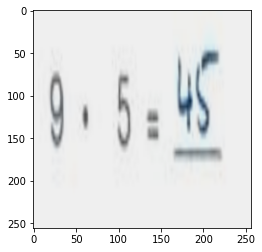

In [11]:
index = 3
className = ["Equation", "No_Equation"]
plt.imshow(X[index])
print(y[index])
#print('The ', index ,'. image is labeled as: ', className[] )